Набор данных о ценах на подержанные автомобили
Набор данных для прогнозирования цен на подержанные автомобили

Описание набора данных:
1552 строки, 15 столбцов

Атрибуты:

car_name
регистрация_год
страховая валидность
fuel_type
места
kms_driven
право собственности
трансмиссия
год производства
пробег (kmpl)
двигатель (куб.см)
максимальная мощность (л.с.)
крутящий момент (Нм)
цена (в лакхах)

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
dataPandasSimple = pd.read_csv('Used Car Dataset.csv', delimiter=',')
dataPandasSimple.drop(columns=["Unnamed: 0", "engine(cc)"], inplace=True)
dataPandasSimple.head(5)

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,17746.0,24.00


In [98]:
dataPandasSimple.describe()

,seats,kms_driven,manufacturing_year,mileage(kmpl),max_power(bhp),torque(Nm),price(in lakhs)
count,1549.00000,1549.000000,1549.000000,1549.000000,1.549000e+03,1.549000e+03,1549.000000
mean,91.70368,52871.165268,2017.400904,237.067966,1.472808e+10,1.423989e+04,166.519258
std,2406.52323,40103.619123,2.949624,586.127342,2.186332e+11,9.666241e+04,3483.338542
min,4.00000,620.000000,2007.000000,7.810000,1.700000e+01,5.000000e+00,1.000000
25%,5.00000,30000.000000,2015.000000,16.340000,1.197000e+03,4.000000e+02,4.700000
50%,5.00000,49000.000000,2018.000000,18.900000,1.462000e+03,1.173000e+03,7.140000
75%,5.00000,70000.000000,2019.000000,22.000000,1.995000e+03,8.850000e+03,17.000000
max,67000.00000,810000.000000,2023.000000,3996.000000,3.258640e+12,1.464800e+06,95000.000000


In [83]:
dataPandasSimple.dropna(inplace=True)

In [84]:
dataPandasSimple.isnull().sum()

car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         0
max_power(bhp)        0
torque(Nm)            0
price(in lakhs)       0
dtype: int64

In [85]:
dataPandasSimple['manufacturing_year'].unique()

array(['2017', '2020', '2018', '2019', '2015', '2021', '2014', '2022',
       '2010', '2011', '2023', '2016', '2009', '2013', 'Power Steering',
       '2012', 'Power Windows Front', 'Air Conditioner', '2007'],
      dtype=object)

In [86]:


# Предположим, что у вас есть DataFrame dataPandasSimple с колонкой manufacturing_year

# Значения, которые нужно заменить на медиану
values_to_replace = ['Power Steering', 'Power Windows Front', 'Air Conditioner']  # Замените на фактические значения

dataPandasSimple['manufacturing_year'] = dataPandasSimple['manufacturing_year'].replace(values_to_replace, np.nan)

# Преобразование столбца в числовой формат
dataPandasSimple['manufacturing_year'] = pd.to_numeric(dataPandasSimple['manufacturing_year'], errors='coerce')

# Вычисление медианы столбца manufacturing_year без учета недопустимых значений
median_year = dataPandasSimple['manufacturing_year'].median()

# Замена NaN (недопустимых значений) на медиану
dataPandasSimple['manufacturing_year'] = dataPandasSimple['manufacturing_year'].fillna(median_year)
dataPandasSimple['manufacturing_year'] = dataPandasSimple['manufacturing_year'].astype(int)
dataPandasSimple

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,250.0,17.41
1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,2018,999.00,6706.0,91.0,3.98
1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,887.0,5.85
1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,75.0,4.75


In [87]:
dataPandasSimple['manufacturing_year'].unique()

array([2017, 2020, 2018, 2019, 2015, 2021, 2014, 2022, 2010, 2011, 2023,
       2016, 2009, 2013, 2012, 2007])

In [88]:
category_сolumns = dataPandasSimple.select_dtypes(include=['object']).columns.tolist()
numerical_columns = dataPandasSimple.select_dtypes(exclude=['object']).columns.tolist()
category_сolumns

['car_name',
 'registration_year',
 'insurance_validity',
 'fuel_type',
 'ownsership',
 'transmission']

In [89]:
print(dataPandasSimple.columns)



Index(['car_name', 'registration_year', 'insurance_validity', 'fuel_type',
       'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'max_power(bhp)', 'torque(Nm)',
       'price(in lakhs)'],
      dtype='object')


<Axes: >

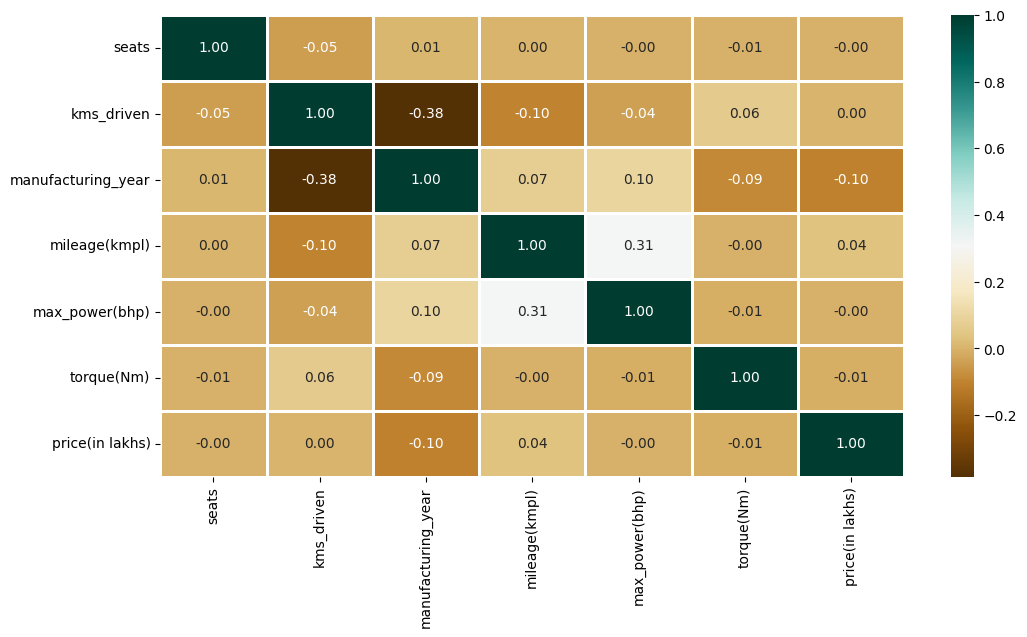

In [90]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataPandasSimple[numerical_columns].corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [91]:
encoded_data = pd.get_dummies(dataPandasSimple, columns=category_сolumns)

encoded_data

,seats,kms_driven,manufacturing_year,mileage(kmpl),max_power(bhp),torque(Nm),price(in lakhs),car_name_2007 Maruti SX4 Vxi BSIII,car_name_2009 Hyundai i10 Era,car_name_2009 Hyundai i10 Era 1.1,...,transmission_2016,transmission_2017,transmission_2018,transmission_2020,transmission_2021,transmission_2022,transmission_2023,transmission_Automatic,transmission_Manual,transmission_Power Windows Front
0,5,56000,2017,7.81,2996.0,333.0,63.75,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,5,30615,2020,17.40,999.0,9863.0,8.99,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,5,24000,2018,20.68,1995.0,188.0,23.75,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,5,18378,2019,16.50,1353.0,13808.0,13.56,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,5,44900,2019,14.67,1798.0,17746.0,24.00,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,5,35000,2020,1493.00,11345.0,250.0,17.41,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1549,5,10000,2018,999.00,6706.0,91.0,3.98,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1550,5,49000,2017,17.50,1199.0,887.0,5.85,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1551,5,40000,2018,18.78,999.0,75.0,4.75,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [92]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Предположим, что у вас есть DataFrame encoded_data
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(encoded_data)
scaled_data = pd.DataFrame(scaled_values, columns=encoded_data.columns)

# Теперь scaled_data содержит нормализованные значения и имеет те же названия столбцов, что и исходный encoded_data


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = scaled_data.drop(columns=['price(in lakhs)'])
y = scaled_data['price(in lakhs)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [1, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error на тестовой выборке:", mse)


Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Mean Squared Error на тестовой выборке: 0.0032257324191178652


In [96]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")


R-squared: -0.003510439969372836


In [97]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.003271285028806755


На основе представленных метрик можно сделать вывод о том, что модель имеет низкое значение MSE и MAE, что говорит о том, что она показывает неплохую точность в предсказаниях на тестовой выборке. Однако, отрицательное значение R-squared говорит о том, что модель может показывать результаты хуже, чем простые базовые модели, что требует дополнительного анализа и, возможно, улучшения модели или выбора других методов для работы с данными.

Второе дз. Будем использовать не логистическую, а линейную задачу, так как задача регрессии

In [101]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Задаем значения параметра alpha, которые нужно проверить
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Создаем модель
ridge = Ridge()

# Задаем Grid Search с перекрестной проверкой
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_param = grid_search.best_estimator_
y_pred = best_param.predict(X_test)
# Выводим наилучшие параметры и оценку модели
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Отрицательное значение MSE


Best Parameters: {'alpha': 0.1}
Best Score: 0.0008795726471449896


In [102]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error на тестовой выборке:", mse)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Squared Error на тестовой выборке: 0.0031871599811218857
R-squared: 0.008489267134238032
Mean Absolute Error: 0.003975540115920111


In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

random_forest = RandomForestRegressor()

# Задаем значения гиперпараметров, которые нужно проверить
param_grid = {
    'n_estimators': [100, 300, 500],  # количество деревьев
    'max_depth': [None, 10, 20],  # максимальная глубина деревьев
    'min_samples_split': [2, 5, 10]  # минимальное количество выборок для разделения узла
}

# Задаем Grid Search с перекрестной проверкой
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Выводим наилучшие параметры и оценку модели
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Отрицательное значение MSE

# Используем найденные лучшие параметры для обучения модели RandomForestRegressor
best_params = grid_search.best_params_
best_random_forest = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                           max_depth=best_params['max_depth'],
                                           min_samples_split=best_params['min_samples_split'], n_jobs=-1)

# Обучение модели на всем обучающем наборе данных
best_random_forest.fit(X_train, y_train)

# Получение предсказаний на тестовом наборе данных
predictions = best_random_forest.predict(X_test)



Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.0008883766767216259


In [105]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error на тестовой выборке:", mse)
r_squared = r2_score(y_test, predictions)
print(f"R-squared: {r_squared}")
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")


Mean Squared Error на тестовой выборке: 0.003225741959061916
R-squared: -0.0035134078018548287
Mean Absolute Error: 0.003254350494286349


In [106]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
from itertools import product

first_size = np.arange(50, 101, 50)
second_size = np.arange(50, 101, 50)
alpha_values = np.array([0.0001, 0.0005])
hidden_layer_sizes = list(product(first_size, second_size))

params_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'alpha': alpha_values
}

# Предположим, что у вас есть X_train, y_train для обучения модели
grid = GridSearchCV(MLPRegressor(), params_grid, scoring='neg_mean_squared_error', return_train_score=False, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_estimator_, grid.best_score_


Fitting 5 folds for each of 8 candidates, totalling 40 fits


(MLPRegressor(alpha=0.0005, hidden_layer_sizes=(50, 100)),
 -0.0010120972088774561)

In [109]:
predictions = grid.predict(X_test)

In [110]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error на тестовой выборке:", mse)
r_squared = r2_score(y_test, predictions)
print(f"R-squared: {r_squared}")
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")


Mean Squared Error на тестовой выборке: 0.003360291453144579
R-squared: -0.04537113326113951
Mean Absolute Error: 0.010275159629640521


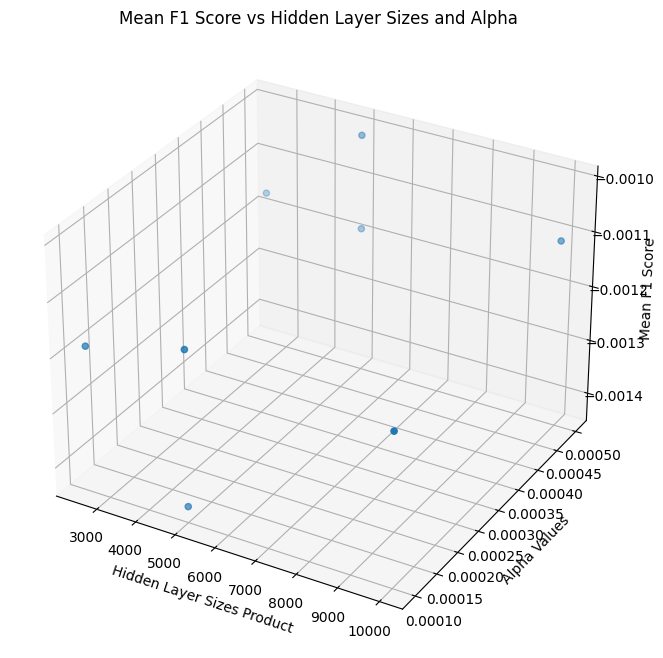

In [108]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


results = grid.cv_results_
hidden_layer_sizes = results['param_hidden_layer_sizes']
alpha_values = results['param_alpha']
scores = results['mean_test_score']


hidden_layer_sizes_numeric = [np.prod(size) for size in hidden_layer_sizes]
alpha_values_numeric = [float(val) for val in alpha_values]


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(hidden_layer_sizes_numeric, alpha_values_numeric, scores)


ax.set_xlabel('Hidden Layer Sizes Product')
ax.set_ylabel('Alpha Values')
ax.set_zlabel('Mean F1 Score')
ax.set_title('Mean F1 Score vs Hidden Layer Sizes and Alpha')

plt.show()


В целом, вычесленные метрики показывают примерно одну и ту же ситуацию. Модель достаточно хорошо предсказывает цены автомобилей. Переобучения не наблюдается.